<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(U2)=
# Unidad 2

## Ecuaciones Diferenciales de Orden Superior

En el capítulo anterior, estudiamos diversas ecuaciones diferenciales de primer orden y cómo estas se aplican al análisis y soluciones de problemas. Es este capítulo, estudiaremos EDO donde aparezcan derivadas de orden mayor que $1$.

### Sistemas Masa-Resorte. Movimiento Libre 

Un resorte se suspende verticalmente de un soporte rígido y luego se le fija una masa $m$ a su extremo libre. La cantidad de alargamiento o elongación del resorte depende de la masa (mayor masa, mayor elongación). Por la [**ley de Hooke**](https://en.wikipedia.org/wiki/Hooke%27s_law), el resorte mismo ejerce una fuerza restauradora $F_r$ opuesta a la dirección de elongación, y es proporcional a la cantidad de elongación $s$. Se expresa como 

$$
F_r=ks,
$$ 

donde $k$ es una constante de proporcionalidad llamada **constante del resorte**.

Después de que se une una masa $m$ a un resorte, esta alarga el resorte una cantidad $s$ y logra una posición de equilibrio en la cual su peso $W$ se equilibra mediante la fuerza restauradora $ks$. La **condición de equilibrio** es $mg=ks$. Posteriormente, si la masa se desplaza una cantidad $x$ de su posición de equilibrio, la fuerza restauradora del resorte es entonces $F_r=k(x+s)$.

```{figure} masa1.png
---
height: 200px
name: Masa-Resorte
---
Sistema Masa-Resorte
```

Suponiendo que no hay fuerzas restauradoras adicionales que actúan sobre el sistema masa-resorte y suponiendo que la masa vibra libre de otras fuerzas externas (**movimiento libre**), usando la segunda ley de Newton, obtenemos

$$
m\ddot x=\sum F~\Rightarrow~m\ddot x=-F_r+W~,~\text{es decir}
$$ 

$$
m\frac{d^2x}{dt^2}=-k(x+s)+mg~\Rightarrow~m\frac{d^2x}{dt^2}=-kx~\Leftrightarrow~\frac{d^2x}{dt^2}+\frac{k}{m}x=0.
$$ 
Esta es una EDO lineal de segundo orden con coeficientes constantes que puede ser reescrita como 

$$
\frac{d^2x}{dt^2}+\omega^2x=0~~,~~\omega^2=\frac{k}{m}
$$ (eqMAS)

La EDO [](eqMAS) describe el <u>**movimiento armónico simple**</u> o <u>**movimiento libre no amortiguado**</u>. Podemos establecer un PVI considerando las condiciones de **desplazamiento inicial** $x(0)=x_0$ y **velocidad inicial** $x'(0)=v_0$.

**Convención**: Los desplazamientos medidos abajo de la posición de equilibrio son positivos:

```{figure} masa2.png
---
height: 200px
name: Masa-Resorte2
---
Convención del Signo
```

### Movimiento Libre Amortiguado

Supongamos ahora que la masa del sistema está sometida a una **fuerza de amortiguamiento** $F_a$, que es proporcional a la velocidad instantánea $\frac{dx}{dt}$, digamos que $F_a=\beta\frac{dx}{dt}$. 

```{figure} masa5.png
---
height: 200px
name: Masa-Resorte3
---
Sistema Masa-Resorte sometido a una Fuerza Amortiguadora
```

Cuando ninguna otra fuerza actúa sobre el sistema, se tiene que la segunda ley de Newton implica que 

$$
m\frac{d^2x}{dt^2}=-kx-\beta\frac{dx}{dt}
$$

O equivalentemente 

$$
\frac{d^2x}{dt^2}+2\lambda\frac{dx}{dt}+\omega^2x=0~,~\omega^2=\frac{k}{m}~,~2\lambda=\frac{\beta}{m}.
$$ (MLA)

La EDO [](MLA) describe el <u>**movimiento libre amortiguado**</u>.

### Movimiento Forzado

Finalmente, suponga que existe una fuerza externa $f(t)$ que actúa sobr el sistema masa-resorte amortiguado. La segunda ley de Newton implica que 

$$
m\frac{d^2x}{dt^2}=-kx-\beta\frac{dx}{dt}+f(t)
$$ 

o equivalentemente 

$$
\frac{d^2x}{dt^2}+2\lambda\frac{dx}{dt}+\omega^2x=F(t)~,~F(t)=\frac{f(t)}{m}.
$$ (MFA)

La EDO [](MFA) describe el <u>**movimiento forzado**</u>. 

Podemos visualizar en Python una comparación de estos 3 tipos de movimiento, considerando una fuerza externa del tipo  $f(t)=F_0\cos(\gamma t)$, donde $F_0$ es la **amplitud** y $\gamma$ la **frecuencia** de la fuerza externa:

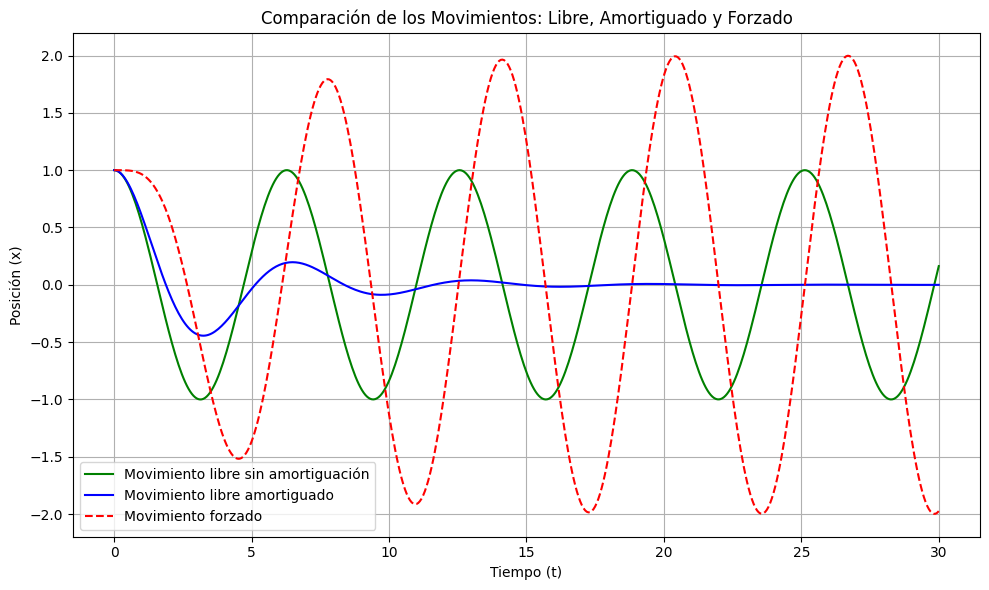

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
m = 1.0   # masa
k = 1.0   # constante del resorte
beta = 0.5   # coeficiente de amortiguamiento
F0 = 1  # amplitud de la fuerza externa (puede ser 0 si no hay fuerza externa)
gamma = 1.0  # frecuencia de la fuerza externa

# Definir el sistema de ecuaciones diferenciales: Una EDO de 2do orden se "separa" como un sistema para aplicar el
#el comando solve_ivp
def masa_resorte(t, y, m, k, beta, F0, gamma):
    x, v = y
    dxdt = v
    dvdt = -(k/m) * x - (beta/m) * v + (F0/m) * np.cos(gamma * t) #Fuerza externa F0*cos(gamma*t): se puede cambiar
    return [dxdt, dvdt]

# Condiciones iniciales
y0 = [1.0, 0.0]  # posición inicial x(0)=1, velocidad inicial x'(0)=0

# Tiempo de simulación
t_span = (0, 30)
t_eval = np.linspace(*t_span, 500)

# Resolver las ecuaciones diferenciales para los tres casos
sol_libre_sin_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, 0, 0, 0), t_eval=t_eval)
sol_libre_amort = solve_ivp(masa_resorte, t_span, y0, args=(m, k, beta, 0, 0), t_eval=t_eval)
sol_forzado = solve_ivp(masa_resorte, t_span, y0, args=(m, k, beta, F0, gamma), t_eval=t_eval)

# Graficar los resultados en un mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(sol_libre_sin_amort.t, sol_libre_sin_amort.y[0], label='Movimiento libre sin amortiguación', color='green')
plt.plot(sol_libre_amort.t, sol_libre_amort.y[0], label='Movimiento libre amortiguado', color='blue')
plt.plot(sol_forzado.t, sol_forzado.y[0], label='Movimiento forzado', linestyle='dashed', color='red')

plt.title('Comparación de los Movimientos: Libre, Amortiguado y Forzado')
plt.xlabel('Tiempo (t)')
plt.ylabel('Posición (x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En los 3 casos anteriores, tenemos ecuaciones de segundo orden con coeficientes constantes: ¿Existe algún método para determinar sus soluciones de modo analítico? En las próximas sesiones, veremos un procedimiento para determinar dichas soluciones.

<!--######################################################################################################################################################################################################################################################################################################################################################
-->

## Ecuaciones Diferenciales Lineales con Coeficientes Constantes

### Orden 2

Nos interesa resolver la EDO Lineal Homogénea (es decir, igualada a $0$) con coeficientes constantes:

$$
ay''+by'+cy=0~~,~~a,b,c\in\mathbb{R},a\neq0.
$$

El procedimiento de resolución consiste en suponer que $y(x)=e^{mx}$ es una solución para algún $m\in\mathbb{R}$ (¿por qué se puede suponer esto?). Derivando y reemplazando, llegamos a la **ecuación auxiliar** 

$$
am^2+bm+c=0
$$

Las soluciones de esta ecuación cuadrática en $m$ son 

$$
m_1=\frac{-b+\sqrt{\Delta}}{2a}~,~m_2=\frac{-b-\sqrt{\Delta}}{2a}
$$ 

y, a partir de ellas, tenemos 3 casos:

1. Si $m_1,m_2$ son <u>raíces reales distintas</u>: La solución es

$$
y_H(x)=c_1e^{m_1x}+c_2e^{m_2x}
$$ (RRD)

2. Si $m_1=m_2$ es <u>una raíz real repetida</u>: La solución es

$$
y_H(x)=c_1e^{m_1x}+c_2xe^{m_1x}
$$ (RRI)

3. Si $m_1,m_2$ son <u>raíces complejas conjugadas</u>: $m_1=\alpha+\beta i$ y $m_2=\alpha-\beta i$, entonces la solución es

$$
y_H(x)=c_1e^{\alpha x}\cos(\beta x)+c_2e^{\alpha x}\sin(\beta x)
$$ (RCC)

**Nota**: Advierta que para una EDO de orden 2, es necesario que existan dos soluciones básicas (o fundamentales) $y_1$, $y_2$ que sean [**linealmente independientes**](LI) y todas las [**combinaciones lineales**](CL) de ellas [**generan**](Gen) la solución de esta EDO.

```{admonition} Ejercicio Teórico
Determine la solución de $2y''-3y'+4y=0.$
```

In [2]:
import sympy as sp

# Definir la variable independiente y la función dependiente
t = sp.Symbol('t')
y = sp.Function('y')(t)

# Definir la ecuación diferencial no homogénea
edo_no_homogenea = sp.Eq(2*y.diff(t, 2) - 3*y.diff(t) + 4*y, 0)

# Resolver la ecuación diferencial no homogénea
solucion_no_homogenea = sp.dsolve(edo_no_homogenea)

# # Mostrar la solución general
print("Solución de la EDO no homogénea:")
display(solucion_no_homogenea)

Solución de la EDO no homogénea:


Eq(y(t), (C1*sin(sqrt(23)*t/4) + C2*cos(sqrt(23)*t/4))*exp(3*t/4))

### Aplicación a Sistemas Masa-Resorte

La ecuación [](eqMAS) describe el movimiento libre en un sistema masa-resorte. La ecuación auxiliar asociada es $M^2+\frac{k}{m}=0$ o $M^2+\omega^2=0$, cuyas raíces complejas son $M=\sqrt{\frac{k}{m}}=\omega$, por lo que la solución de la EDO es 

$$
x(t)=c_1\cos\left(\sqrt{\frac{k}{m}}t\right)+c_2\sin\left(\sqrt{\frac{k}{m}}t\right)=c_1\cos(\omega t)+c_2\sin(\omega t)
$$ (soleqMAS)

La ecuación [](MLA) describe el movimiento amortiguado en un sistema masa-resorte. La ecuación auxiliar asociada es $M^2+\frac{\beta}{m}x+\frac{k}{m}=0$ o $M^2+\frac{\beta}{m}M+\omega^2=0$, cuyas raíces son $M_1=-\lambda+\sqrt{\lambda^2-\omega^2}$ y $M_2=-\lambda-\sqrt{\lambda^2-\omega^2}$, por lo que la solución de la EDO depende del signo de $\Delta=\lambda^2-\omega^2$:

1. <u>$\Delta>0$</u>: El sistema está **sobreamortiguado** porque el coeficiente de amortiguamiento $\beta$ es grande comparado con la constante del resorte $k$. La solución en este caso es

$$
x(t)=e^{-\lambda t}\left(c_1e^{\sqrt{\Delta}t}+c_2e^{-\sqrt{\Delta}t}\right)~,~c_1,c_2\in\mathbb{R}
$$ (solMLA1)

2. <u>$\Delta=0$</u>: EL sistema está **críticamente amortiguado** porque cualquier ligera disminución en la fuerza de amortiguamiento daría como resultado un movimiento oscilatorio. La solución en este caso es

$$
x(t)=e^{-\lambda t}\left(c_1+c_2t\right)~,~c_1,c_2\in\mathbb{R}
$$ (solMLA2)

3. <u>$\Delta<0$</u>: En este caso el sistema está **subamortiguado** puesto que el coeficiente de amortiguamiento es pequeño comparado con la constante del resorte. La solución en este caso es

$$
x(t)=e^{-\lambda t}\left(c_1\cos(\sqrt{-\Delta}t)+c_2\sin(\sqrt{-\Delta}t)\right)~,~c_1,c_2\in\mathbb{R}
$$ (solMLA3)

### Ecuaciones de Orden Superior

En general, para resolver la EDO Lineal Homogénea con coeficientes constantes:

$$
a_ny^{(n)}+\cdots+a_1y'+a_0y=0~~,~~a_i\in\mathbb{R}, a_n\neq0
$$ 

se debe resolver una **ecuación auxiliar** de $n$-ésimo orden 

$$
a_nm^n+\cdots+a_2m^2+a_1m+a_0=0.
$$ 

Si todas las raíces de esta ecuación auxiliar son reales y distintas, entonces la solución es 

$$
y_H(x)=c_1e^{m_1x}+c_2e^{m_2x}+\cdots+c_ne^{m_nx}.
$$

Si la ecuación auxiliar de $n$-ésimo orden tiene raíces repetidas, digamos $m_1$ es una raíz de multiplicidad $k$, es posible demostrar que las soluciones LI son 

$$
e^{m_1x},xe^{m_1x},x^2e^{m_1x},\ldots,x^{k-1}e^{m_1x}
$$ 

y la solución general debe contener una combinación lineal de ellas.

Por último, si $m_1=\alpha+\beta i$, $\beta>0$, es una raíz compleja de multiplicidad $k$ de una ecuación auxiliar con coeficientes reales, entonces su conjugada $m_2=\alpha-\beta i$ es también una raíz de multiplicidad $k$ y la solución general de la ecuación diferencial correspondiente debe tener una combinación lineal de las $2k$ soluciones reales linealmente independientes 

$$
e^{\alpha x}\cos(\beta x), xe^{\alpha x}\cos(\beta x),x^2e^{\alpha x}\cos(\beta x),\ldots,x^{k-1}e^{\alpha x}\cos(\beta x)
$$ 
$$
e^{\alpha x}\sin(\beta x), xe^{\alpha x}\sin(\beta x), x^2e^{\alpha x}\sin(\beta x),\ldots,x^{k-1}e^{\alpha x}\sin(\beta x)
$$

```{admonition} Ejercicio Teórico (Propuesto)
Resuelva el PVI $y'''+2y''-5y'-6y=0$ , $y(0)=y'(0)=0$, $y''(0)=1.$
```

## Soluciones Particulares

Ya sabemos cómo resolver una EDO Lineal y Homogénea con coeficientes constantes (obteniendo $y_H(x)$), pero: ¿Es posible determinar una solución general de la EDO no homogénea 

$$
a_ny^{(n)}+\cdots+a_1y'+a_0y=g(x)
$$ (EDOL)

como en la EDO [](MFA) que modela el sistema masa-resorte forzado?

Tal como en Álgebra Lineal, donde la solución de un sistema de ecuaciones lineales $A\vec{x}=\vec{b}$ es siempre de la forma $\vec{x}=\vec{x}_H+\vec{x}_P$ (con $\vec{x}_H$ solución del sistema homogéneo asociado $A\vec{x}=\vec{0}$ y $\vec{x}_P$ una solución particular del sistema general), la solución general de una EDO Lineal no homogénea se puede escribir como $y(x)=y_H(x)+y_P(x)$. Para determinar la solución particular $y_P(x)$, tenemos el siguiente método:

### Método de los Coeficientes Indeterminados

La idea fundamental de este método es una conjetura acerca de la forma de $y_P(x)$, motivada por las clases de funciones que forman la función $g(x)$. El método general se limita a EDO lineales como [](EDOL) donde $g(x)$ es una <u>constante</u> $k$, una <u>función polinomial</u>, <u>exponencial</u> $e^{ax}$, o <u>trigonométrica</u> del tipo $\sin(\beta x)$, $\cos(\beta x)$ o sumas finitas y productos de estas funciones.

```{admonition} Ejercicio Teórico
Resuelva la EDO dada ensayando una solución particular adecuada: $2y''-3y'+4y=x+1.$
```

**Nota**: Este método no es aplicable a EDO donde $g(x)$ es $\ln(x)$, $\frac{1}{x}$, $\tan(x)$, $\arcsin(x)$, etc.

**Tabla de Ensayos**

```{figure} Tabla.png
---
height: 250px
name: Tabla Ensayo
---
Tabla con posibles ensayos de soluciones particulares
```

**Nota**: Si $g(x)$ consiste en una suma de $m$ términos de las clases listadas en la tabla, entonces el ensayo de una solución particular $y_P(x)$ consiste en la suma de las $m$ funciones de ensayo menores $y_{p_1},y_{p_2},\ldots,y_{p_m}$, es decir 

$$
y_P(x)=y_{p_1}+y_{p_2}+\cdots+y_{p_m}
$$

```{admonition} Ejercicio Teórico
Determine una solución particular de: $y''-y'+\frac{1}{4}y=2x+e^x.$
```

```{admonition} Ejercicio Teórico
Use el método de los coeficientes indeterminados para encontrar una solución particular de $y''-2y'+2y=e^x\sin(x).$ ¿Qué ocurre con su solución particular de ensayo?
```

**Nota**: Si $g(x)$ consiste en una suma de $m$ términos de la clase listada en la tabla, donde una solución particular es $y_P(x)=y_{p_1}+y_{p_2}+\cdots+y_{p_m}$ pero alguna $y_{p_i}$ contiene términos que **duplican** los términos de la solución homogénea $y_H(x)$, entonces esa $y_{p_i}$ debe multiplicarse por $x^n$, donde $n$ es el entero positivo más pequeño que elimina esa duplicación.

### Resonancia

Con el aparataje técnico anterior, podemos resolver la ecuación diferencial [](MFA) para una fuerza externa $f(t)$. La EDH asociada tiene solución $x_H(t)$ como en [](solMLA1), [](solMLA2) o [](solMLA3), dependiendo del signo de $\Delta=\lambda^2-\omega^2=\left(\frac{\beta}{2m}\right)^2-\frac{k}{m}$. La solución particular $x_P(t)$ se obtiene por el método de los coeficientes indeterminados y depende de la forma de la fuerza externa

En particular, si $\beta=0$, tenemos la solución de [](soleqMAS) como $x_H(t)=c_1\cos(\omega t)+c_2\sin(\omega t)$. Ahora consideramos el 

$$
\mathbf{PVI}~~~~\left\{\begin{array}{ccc}\dfrac{d^2x}{dt^2}+\omega^2x&=&F_0\cos(\gamma t)\\ x(0)&=&0\\ x'(0)&=&0\end{array}\right.
$$ 

con una fuerza externa periódica $F_0\cos(\gamma t)$. Observamos su solución en Python para diversos valores de los parámetros involucrados:

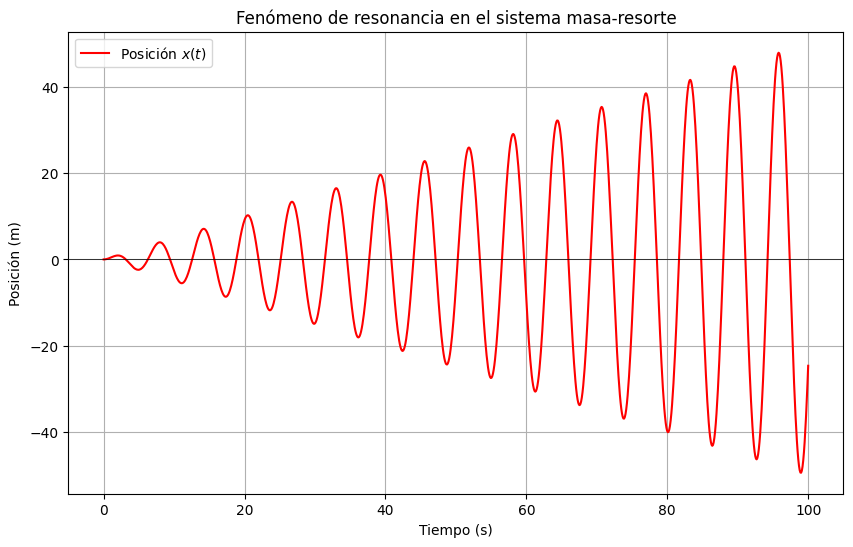

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
m = 1.0       # masa (kg)
k = 1.0       # constante del resorte (N/m)
beta = 0      # coeficiente de amortiguamiento (kg/s)
F0 = 1.0      # amplitud de la fuerza externa (N)
gamma = 1.0  # frecuencia de la fuerza externa (rad/s)

# Frecuencia natural del sistema
omega = np.sqrt(k / m)

# Definimos el sistema de ecuaciones diferenciales
def sistema_masa_resorte(t, y):
    x, v = y  # y = [x, v], donde x es la posición y v la velocidad
    dxdt = v
    dvdt = (F0 * np.cos(gamma * t) - beta * v - k * x) / m
    return [dxdt, dvdt]

# Condiciones iniciales
x0 = 0.0  # Posición inicial (m)
v0 = 0.0  # Velocidad inicial (m/s)
y0 = [x0, v0]

# Tiempo de simulación
t_span = (0, 100)  # Tiempo desde 0 hasta 100 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Puntos de evaluación

# Resolver la EDO
sol = solve_ivp(sistema_masa_resorte, t_span, y0, t_eval=t_eval)

# Extraer la solución
t = sol.t
x = sol.y[0]  # Posición de la masa

# Graficar la posición en función del tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Posición $x(t)$', color='r')
plt.axhline(0, color='k',linewidth=0.5)
plt.title('Fenómeno de resonancia en el sistema masa-resorte')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.grid(True)
plt.legend()
plt.show()

La solución analítica particular es $x_P(t)=\frac{F_0}{\omega^2-\gamma^2}\cos(\gamma t)$ para $\gamma\neq\omega$, por lo que la solución del PVI es 

$$
x(t)=-\frac{F_0}{\omega^2-\gamma^2}\cos(\omega t)+\frac{F_0}{\omega^2-\gamma^2}\cos(\gamma t)~,~\gamma\neq\omega
$$

(donde las constantes $c_1,c_2$ se obtienen a partir de las condiciones iniciales).

¿Qué ocurre si $\gamma=\omega$? En este caso hay duplicación, por lo que debemos ensayar una solución particular del tipo 

$$
x_P(t)=At\cos(\omega t)+Bt\sin(\omega t)
$$

Derivamos y simplificamos, para obtener que $A=0$ y $B=\frac{F_0}{2\omega}$. De este modo, la solución del PVI es

$$
x(t)=\frac{F_0}{2\omega}t\sin(\omega t)
$$

Claramenente $\displaystyle\lim_{t\to+\infty}x(t)=+\infty$. Esto se conoce como el fenómeno de **resonancia pura**. Podemos observar la resonancia en el [Puente de Tacoma](https://es.wikipedia.org/wiki/Puente_de_Tacoma_(1940)) (aunque hay hipótesis que apuntan a otras variables para explicar el colapso del puente colgante).

## Teoría Ecuaciones Lineales de Orden Superior

### Preliminares

Un PVI es **lineal** de $n$-**ésimo orden** si es de la forma 

$$
\left\{\begin{array}{c}
   a_n(x)\dfrac{d^ny}{dx^n}+\cdots+a_1(x)\dfrac{dy}{dx}+a_0(x)y=g(x)\\
   y(x_0)=y_0,\ldots, y^{(n-1)}(x_0)=y_{n-1}
\end{array}\right.
$$ 

Si $g(x)=0$ diremos que la ED es **homogénea** (escribimos EDH) y si $g(x)\neq0$ diremos que es **no homogénea**.

**Existencia y Unicidad**: Supondremos que $a_0(x),\ldots,a_{n}(x)$, $g(x)$ son funciones continuas y que $a_n(x)\neq0$ para todo $x$ en un intervalo $I$. Si $x=x_0\in I$ entonces existe una solución única $y(x)$ del PVI.

**Operadores Diferenciales**: Usando la notación de Leibniz para la derivada, escribimos 

$$
Dy=\frac{dy}{dx}, D^2y=\frac{d^2y}{dx^2},\ldots, D^ny=\frac{d^ny}{dx^n}
$$ 

Con esto definimos el **operador diferencial** $L$ como 

$$
L=a_n(x)D^n+a_{n-1}(x)D^{n-1}+\cdots+a_1(x)D+a_0(x)
$$ 

y podemos escribir la EDO lineal de orden $n$ como 

$$
L(y)=g(x)~~\textrm{o}~~Ly=g(x)
$$ 

Este operador es una [**transformación lineal**](TL): $L(af(x)+bg(x))=aLf+bLg$, $a,b\in\mathbb{R}$.

**Nota**: Toda ED puede expresarse en términos del operador diferencial $D$: por ejemplo 

$$
y''+\cos(x)y'+6y=e^x+2~~\Leftrightarrow~~(D^2+\cos(x)D+6)y=e^x+2
$$

### Ecuaciones Homogéneas. Principio de Superposición

**Principio de Superposición**: La suma o **superposición** de 2 o más soluciones de una EDH también es solución.

**Teorema**: Sean $y_1(x), y_2(x),\ldots, y_k(x)$ soluciones de la EDH de orden $n$ en un intervalo $I$. Entonces la combinación lineal 

$$
y(x)=c_1y_1(x)+c_2y_2(x)+\cdots+c_ky_k(x)~~,~~c_i\in\mathbb{R}
$$ 

también es una solución en el intervalo $I$. 

**Corolario**:

1. Si $y_1(x)$ es una solución de la EDH entonces un múltiplo constante de ella $y(x)=cy_1(x)$ también es solución de la EDH.
2. Una EDH tiene siempre la solución trivial $y(x)=0$.

```{admonition} Ejercicio Teórico
Compruebe que $y_1(x)=e^x$ e $y_2(x)=xe^x$ son soluciones de la EDH $y''-2y'+y=0$ y que

$$
y(x)=c_1e^x+c_2xe^x
$$ 

es también solución de la EDH, para todo $x\in\mathbb{R}$.
```

In [4]:
from sympy import symbols, diff, exp

# Definir la variable independiente y las funciones
x = symbols('x')
y1 = exp(x)
y2 = x* exp(x)

# Definir la ecuación diferencial
def check_solucion(y):
    # Derivadas
    y_primera = diff(y, x)
    y_segunda = diff(y_primera, x)
    
    # Sustituir en la ecuación diferencial y'' - 2y' + y = 0
    return y_segunda - 2*y_primera + y

# Modificar la función para que devuelva una respuesta clara
def check_solucion_verbal(y, label):
    result = check_solucion(y)
    if result == 0:
        return f"{label} es solución."
    else:
        return f"{label} no es solución."

# Verificar si y1 y y2 son soluciones
check_y1_verbal = check_solucion_verbal(y1, "y1(x) = e^x")
check_y2_verbal = check_solucion_verbal(y2, "y2(x) = xe^x")

check_y1_verbal, check_y2_verbal

('y1(x) = e^x es solución.', 'y2(x) = xe^x es solución.')

### Dependencia e Independencia Lineal. Wronskiano

El conjunto de funciones $\{f_1(x),f_2(x),\ldots,f_n(x)\}$ es **linealmente dependiente (LD)** en el intervalo $I$ si existen constantes $c_1,\ldots,c_n\in\mathbb{R}$, no todas nulas, tal que 

$$
c_1f_1(x)+\cdots+c_nf_n(x)=0~~,~~\forall~x\in~I.
$$ 

Si el conjunto de funciones no es LD, diremos que es **linealmente independiente (LI)**.

```{admonition} Ejercicio Teórico
Pruebe que el conjunto de funciones $\{\sin(2x), \sin(x)\cos(x)\}$ es LD.
```

**Wronskiano**: Supongamos que las funciones $f_1(x),f_2(x),\ldots,f_n(x)$ tienen al menos $n-1$ derivadas. El determinante

$$
W(f_1,f_2,\ldots,f_n)=\left|\begin{array}{cccc}
    f_1 & f_2 & \cdots & f_n \\
    f_1' & f_2' & \cdots & f_n' \\
    \vdots & \vdots & \cdots & \vdots\\ 
    f_1^{(n-1)} & f_2^{(n-1)} & \cdots & f_n^{(n-1)} \\
\end{array}\right|
$$ 

se llama **Wronskiano** de tales funciones.

**Teorema 1**: Sea $\{y_1(x), y_2(x),\ldots, y_n(x)\}$ un conjunto de $n$ soluciones de la EDH de orden $n$: $L(y)=0$ en un intervalo $I$. 

$$
\{y_1(x), y_2(x),\ldots, y_n(x)\}~\text{es LD}~\Leftrightarrow~W(y_1,y_2,\ldots,y_n)=0, \forall~x\in I.
$$

Equivalentemente:

**Teorema 2**: Sea $\{y_1(x), y_2(x),\ldots, y_n(x)\}$ un conjunto de $n$ soluciones de la EDH de orden $n$: $L(y)=0$ en un intervalo $I$. 

$$
\{y_1(x), y_2(x),\ldots, y_n(x)\}~\text{es LI}~\Leftrightarrow~W(y_1,y_2,\ldots,y_n)\neq0,
$$ 

para algún $x\in I.$

**Nota**: En el Teorema 1, se puede debilitar la condición: 

$$
W(y_1,y_2,\ldots,y_n)(x_0)=0,~\textrm{para algún}~x_0\in I\Rightarrow~W(y_1,y_2,\ldots,y_n)=0,
$$ 

$\forall~x\in I~\Rightarrow~\{y_1(x), y_2(x),\ldots, y_n(x)\}~\text{es LD}$.

<!-- La demostración de estos Teoremas que relacionan dependencia e independencia lineal de soluciones con el Wronskiano excede los objetivos del curso. Para estudiarla, recomendamos ver el libro de George Simmons *Ecuaciones Diferenciales*, Segunda Edición, Página 571: **Teorema de Picard**. -->

```{admonition} Ejercicio Teórico
Pruebe que el conjunto de funciones $\{\sin(2x), \sin(x)\cos(x)\}$ es LD usando el Wronskiano.
```

In [5]:
import sympy as sp

# Definir la variable simbólica
x = sp.symbols('x')

# Definir las funciones
f1 = sp.sin(2*x)
f2 = sp.sin(x)*sp.cos(x)

# Calcular las derivadas
f1_deriv = sp.diff(f1, x)
f2_deriv = sp.diff(f2, x)

# Crear la matriz de Wronskiano
wronskiano = sp.Matrix([[f1, f2], [f1_deriv, f2_deriv]])

# Calcular el determinante del Wronskiano
det_wronskiano = wronskiano.det()

# Simplificar el determinante
det_simplificado = sp.simplify(det_wronskiano)

# Mostrar el resultado
f"El wronskiano es {det_simplificado}"

'El wronskiano es 0'

### Conjunto Fundamental de Soluciones

**Definición**: Cualquier conjunto $\{y_1(x), y_2(x),\ldots, y_n(x)\}$ de $n$ soluciones LI de la EDH de orden $n$, $L(y)=0$ en $I$, es un **conjunto fundamental de soluciones** de la EDH.

**Teorema**: Sea $\{y_1(x), y_2(x),\ldots, y_n(x)\}$ un conjunto fundamental de soluciones de la EDH de orden $n$, $L(y)=0$. Entonces la **solución general** de la EDH en $I$ es 

$$
y(x)=c_1y_1(x)+c_2y_2(x)+\cdots+c_ny_n(x)~~,~~c_i\in\mathbb{R}
$$

<!-- **Ejemplo**: Determine la solución general de la EDH 

$$
y''-2y'+y=0
$$ -->

**Definición**: Cualquier solución $y_p(x)$ (libre de constantes o parámetros) de una ED se denomina **solución particular** de una ED.

**Teorema**: (Solución general de ED no homogéneas). Sea $y_p(x)$ cualquier solución particular de la ED no homogénea de orden $n$, $L(y)=g(x)$ en $I$, y sea $\{y_1(x),\ldots,y_n(x)\}$ un conjunto fundamental de soluciones de la EDH asociada. Entonces la solución general de la ED no homogénea en $I$ es 

$$
y(x)=\underbrace{c_1y_1(x)+\cdots+c_ny_n(x)}_{y_h(x)}+y_p(x)=y_h(x)+y_p(x).
$$

```{admonition} Ejercicio Teórico
Compruebe que 

$$
y(x)=c_1e^{2x}+c_2e^{5x}+6e^x
$$ 

es la solución general de la ED: $y''-7y'+10y=24e^x$, para todo $x\in\mathbb{R}$. 
```

**Nota**: A partir del teorema anterior, nos interesaremos en determinar $y_h(x)$ e $y_p(x)$ para $L(y)=g(x)$.

## Reducción de Orden. Fórmula de Abel

## Método de Variación de Parámetros